In [25]:
'''
Honeybees are currently facing a fragile situation.
You’ve may have heard or read reports on a decline in their populations due to multiple factors.
The goal of this algorithm is to explore this decline and examine how past patterns can help forecast the future of honeybees.
Data on honey production in the United States has 8 features and 628 samples: 
1. State, 2. Number of colonies, 3. Yield per colony, 4. Total production, 5. Stocks held by producers, 6. Price per pound, 7. Production value, and 8. Year. 

The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). 
NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". 
From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered.
https://www.nass.usda.gov/About_NASS/index.php 
https://usda.library.cornell.edu/MannUsda/viewDocumentInfo.do
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")
#Data exploration
print(df.columns)
print(df.head)
print(df.shape)

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')
<bound method NDFrame.head of     state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
621    VA    4000.0           41    164000.0     23000.0        3.77   
622    WA   62000.0           41   2542000.0   1017000.0        2.38   
623    WV    6000.0           48    288000.0     95000.0        2.91   
624    WI   60000.0           69   4140000.0   1863000.0        2.05   
625    WY   50000.0           51   2550000.0    4

In [ ]:
# Data transformation
# Groups total production for all states per year and gets the mean output per state: 5,105,093 lbs in 1998
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


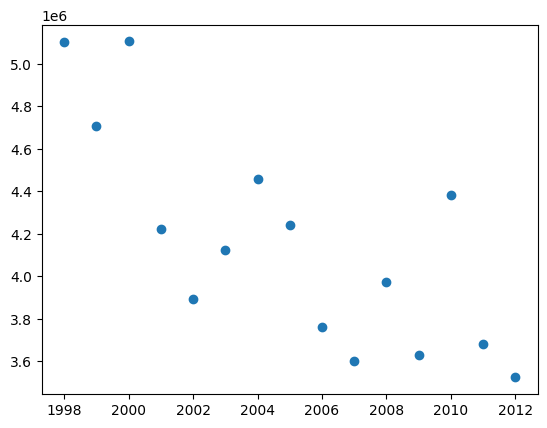

In [27]:
# Year, mean state production scatterplot 
x = prod_per_year['year']
x = x.values.reshape(-1, 1)
y = prod_per_year['totalprod']
plt.scatter(x, y)
plt.show()

In [28]:
# Model coeffecient and y-intercept 
regr = linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.1073298


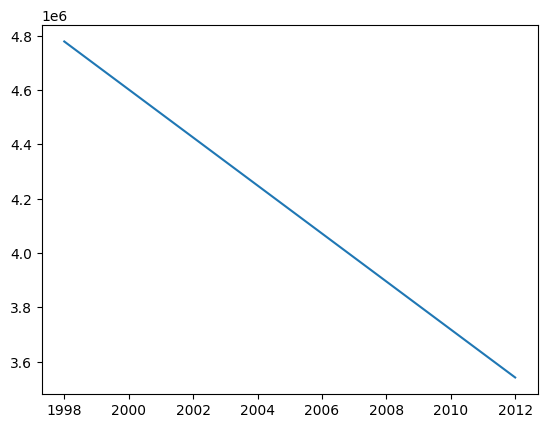

In [29]:
y_predict = regr.predict(x)
plt.plot(x, y_predict)
plt.show()

In [30]:
# Prediction
nums = np.array(range(1, 11))
x_future = np.array(range(2013, 2025))

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]]
[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876]


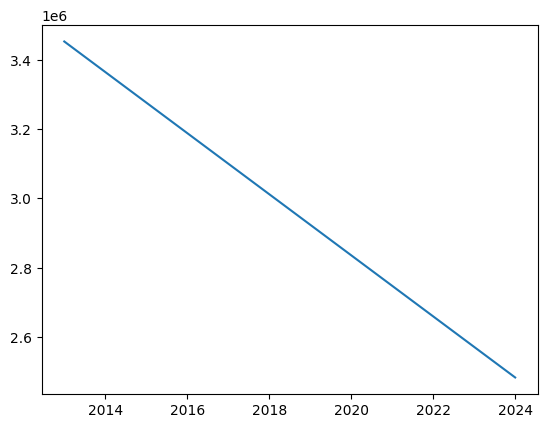

In [31]:
# Reshapes to column instead of row
x_future = x_future.reshape(-1, 1)
print(x_future)
future_predict = regr.predict(x_future)
print(future_predict)
plt.plot(x_future, future_predict)
plt.show()

In [32]:
# Predicted average annual output per state
annual_output = int(input("Enter year: "))
prediction = (regr.coef_ * annual_output) + regr.intercept_
print("Output forecast for", annual_output,":", f"{prediction[0]:,.2f}")

Output forecast for 2019 : 2,923,944.21
